# Test normalnosti i Box-Cox transformacija

Ovde prikazujemo neke od nacina koje mozemo koristiti da utvrdimo da li podaci sa kojima radimo prate normalnu raspodelu. Nakon toga cemo upotrebiti box-cox transformaciju za njihovu normalizaciju. 

Za prikaz rada box-cox transformacije generisemo 'random' skup od 1000 vrednosti iz eksponencijalne raspodele, a kasnije i iz beta raspodele.

## Test normalnosti

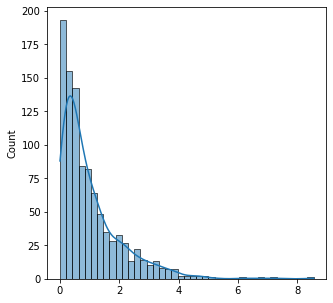

In [57]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# zelimo da napravimo primer moguc za reprodukciju
np.random.seed(0)

# generisemo skup podataka
data = np.random.exponential(size=1000)


plt.figure(figsize = (5, 5))
# kreiramo grafik raspodele
sns.histplot(data, kde=True)   
# opcija kde=True dodaje KDE (Kernel Density Estimate) krivu koja procenjuje verovatnoću raspodele podataka na osnovu histograma.

plt.show()

Iz grafika vidimo da raspodela podataka, ocekivano, **nije normalna**.

---------------------------------------------------------------------------------------------------------------

Jos jedan nacin, pored vizualnog preko grafika, da zakljucimo da podaci nemaju normalnu raspodelu je konstrukcija **Q-Q grafika (Quantile-Quantile Plot)**

Q-Q grafici su grafici koji se koriste za poređenje raspodele dva skupa podataka ili za poređenje jednog skupa podataka sa teorijskom raspodelom (kao što je normalna raspodela). 
Ovi grafici vizualizuju u kojoj meri podaci slede određenu raspodelu, i ako odstupaju, na koji način to čine.


Q-Q grafici se često koriste za procenu normalnosti podataka. Na primer, ako želite da proverite da li podaci slede normalnu raspodelu, možete kreirati Q-Q grafikon gde x-osa predstavlja kvantile normalne raspodele, a y-osa kvantile vaših podataka.

   - Ako tačke leže na pravoj liniji, to sugeriše da vaši podaci slede normalnu raspodelu.
   - Ako tačke odstupaju od linije, to ukazuje na odstupanje od normalnosti.

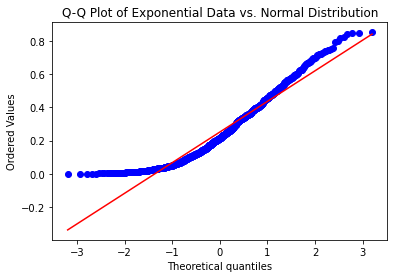

In [31]:
from scipy import stats

# Q-Q plot
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot of Exponential Data vs. Normal Distribution')
plt.show()

------------------------------------------------------------------------------------------------------------

Takodje, za procenu normalnosti uzorka podataka mozemo koristiti i razlicite vrste statistickih testova.

Neki od njih su: 

 - **Shapiro-Wilk Test** (uglavnom za manje uzorke, samo za normalnu raspodelu)
 - **Kolmogorov-Smirnov Test** (generalni test)
 - **Anderson-Darling Test** (modifikacija K-S testa za testiranje normalnosti)

Koristimo Shapiro-Wilk Test za proveru. 
On testira nultu hipotezu da li uzorak podataka potiče iz normalne raspodele racunajuci vrednost p. 

- **p > 0.05**: Ne odbacujemo nultu hipotezu. Podaci mogu biti normalno raspodeljeni.
- **p ≤ 0.05**: Odbacujemo nultu hipotezu. Podaci verovatno nisu normalno raspodeljeni.

In [48]:
# za test je potrebno uvesti funkciju shapiro iz modula scipy.stats
from scipy.stats import shapiro

#racunamo p-vrednost
_, p = shapiro(data)
print('Shapiro-Wilk Test: p=%.3f' % (p))

if p > 0.05:
    print('Podaci su iz normalne raspodele (prihvatamo H0)')
else:
    print('Podaci nisu normalno raspodeljeni (odbacujemo H0)')

Shapiro-Wilk Test: p=0.000
Podaci nisu normalno raspodeljeni (odbacujemo H0)


---------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------

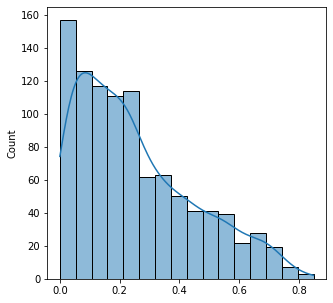

In [51]:
plt.figure(figsize = (5, 5))

# generisemo skup podataka iz beta raspodele, α=1 i β=3
beta_data = np.random.beta(1, 3, 1000)

# generisemo histogram
sns.histplot(beta_data, kde=True)
plt.show()

Iz dobijenog grafika raspodele vidimo da, ocekivano, raspodela podataka **nije normalna**.

----------------------------------------------------------------------------------------------------------------

Izvrsicemo Kolmogorov-Smirnov (K-S) test za proveru normalnosti nasih podataka. 
Ovaj test upoređuje empirijsku distribuciju podataka sa očekivanom distribucijom.

Takodje testira nultu hipotezu da li uzorak podataka potiče iz normalne raspodele racunajuci vrednost p.

- **p > 0.05**: Ne odbacujemo nultu hipotezu. Podaci mogu biti normalno raspodeljeni.
- **p ≤ 0.05**: Odbacujemo nultu hipotezu. Podaci verovatno nisu normalno raspodeljeni.

In [52]:
from scipy.stats import kstest, norm

# Primena Kolmogorov-Smirnov testa za normalnost
# Prvo, transformišemo podatke tako da budu standardizovani (srednja vrednost 0, standardna devijacija 1)
data_standardized = (beta_data - np.mean(beta_data)) / np.std(beta_data)

_, p_value = kstest(data_standardized, 'norm')

# Prikaz rezultata testa
print('p-vrednost:', p_value)

if p_value > 0.05:
    print('Podaci su iz normalne raspodele (prihvatamo H0)')
else:
    print('Podaci nisu normalno raspodeljeni (odbacujemo H0)')

p-vrednost: 7.265791231165236e-10
Podaci nisu normalno raspodeljeni (odbacujemo H0)


## Box-Cox transformacija

Nakon sto smo utvrdili da podaci sa kojima radimo nisu u normalnoj raspodeli, izvrsicemo **Box-Cox transformaciju** nad njima

In [55]:
# uvodimo funkciju boxcox iz modula scipy.stats
from scipy.stats import boxcox

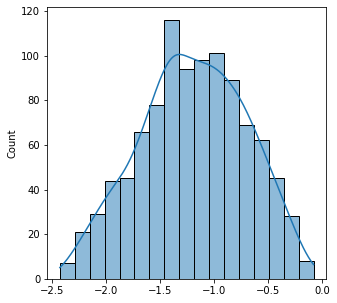

0.4027270968069088


In [56]:
# Primena Box-Cox transformacije
# Box-Cox transformacija zahteva pozitivne podatke
tdata, best_lambda = boxcox(data + 1e-9) # Dodajemo malu vrednost da izbegnemo log(0)

# Vizualizacija transformisanih podataka
plt.figure(figsize = (5, 5))
sns.histplot(tdata, kde=True) 
plt.show()


#prikazujemo najoptimalniju vrednost za lambdu
print(best_lambda)

---------------------------------------------------------------------------------------------------------------

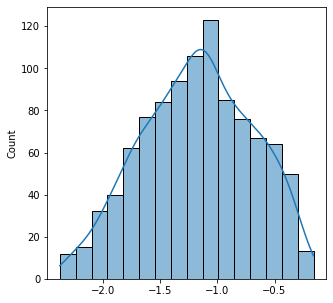

0.41020984300100866


In [54]:
# Primena Box-Cox transformacije
# Box-Cox transformacija zahteva pozitivne podatke
beta_tdata, beta_best_lambda = boxcox(beta_data + 1e-9) # Dodajemo malu vrednost da izbegnemo log(0)

# Vizualizacija transformisanih podataka
plt.figure(figsize = (5, 5))
sns.histplot(beta_tdata, kde=True) 
plt.show()


#prikazujemo najoptimalniju vrednost za lambdu
print(beta_best_lambda)